In [1]:
"""
Authors: Mariusz Krzyzopolski s21544 Tomasz Baj s20499
"""

'\nAuthors: Mariusz Krzyzopolski s21544 Tomasz Baj s20499\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, model_selection, metrics
import pandas as pd

In [3]:
data = pd.read_csv("ionosphere.data", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [4]:
def calkulate_x_y(database: pd.core.frame.DataFrame) -> list:
    "Function used to map results of complex electromagnetic signals"
    ret = []
    for i in range(len(database)):
        arr = list(database.iloc[i])
        even = []
        odd = []
        for i in range(len(arr)):
            if i%2:
                odd.append(arr[i])
            else:
                even.append(arr[i])
        ret.append([np.sum(even)/len(even), np.sum(odd)/len(odd)])
    return ret

In [5]:
# Prepare test and train datasets

X_train = data.iloc[0:199, 0:33]
y_train = data.iloc[0:199, 34]
X_test = data.iloc[200:, 0:33]
y_test = data.iloc[200:, 34]

In [6]:
# Create classificator, train it and make prediction, with score measured by two differend methods

XY = calkulate_x_y(X_test)
svc = svm.SVC(kernel='rbf', C=1).fit(X_train, y_train)
Z = svc.predict(X_test)


print("Accuracy for predicting new Ionosphere data:", metrics.accuracy_score(y_test, Z))
print("Accuracy for predicting new Ionosphere data:", svc.score(X_test, y_test))

Accuracy for predicting new Ionosphere data: 0.9801324503311258
Accuracy for predicting new Ionosphere data: 0.9801324503311258


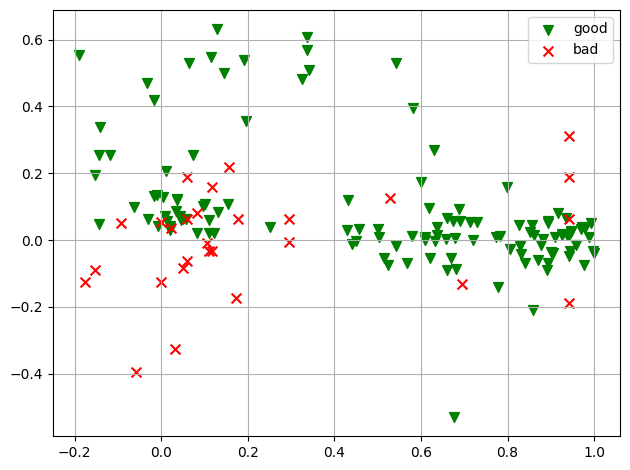

In [7]:
# Plot results with divide for good and bad readings, coresponding to some sctructure in ionosphere

dataplotx = []
dataploty = []
for x in range(len(XY)):
    if Z[x] == 'g':
        dataplotx.append(XY[x][0])
        dataploty.append(XY[x][1])
plt.scatter(dataplotx, dataploty, c='green', marker='v', s=50, label="good")

dataplotx = []
dataploty = []
for x in range(len(XY)):
    if Z[x] == 'b':
        dataplotx.append(XY[x][0])
        dataploty.append(XY[x][1])
plt.scatter(dataplotx, dataploty, c='red', marker='x', s=50, label="bad")

plt.grid()
plt.legend()
plt.tight_layout()
plt.show()